In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:


# Load the data
data = pd.read_csv('final_data.csv')
df = data.drop([data.columns[0]], axis = 1)
data['Time'] = pd.to_datetime(data['Time'], format = '%Y-%m-%d').dt.date
# Show the first few rows of the data
df.head()

,Time,Max Temperature (°F),Avg Temperature (°F),Min Temperature (°F),Max Dew Point (°F),Avg Dew Point (°F),Min Dew Point (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in),Total Precipitation (in),City
0,2022-01-01,73,64.5,54,62,58.9,53,97,83.2,59,18,11.6,0,27.7,27.6,27.5,0.00,"London, UK"
1,2022-01-02,63,57.3,50,61,54.4,48,100,90.5,75,16,8.2,0,27.6,27.6,27.5,0.93,"London, UK"
2,2022-01-03,50,38.0,26,49,34.1,22,97,85.9,61,43,22.8,8,28.0,27.6,27.3,0.65,"London, UK"
3,2022-01-04,42,31.1,22,26,23.3,20,96,74.9,51,12,5.7,0,28.1,28.0,27.9,0.01,"London, UK"
4,2022-01-05,55,40.6,34,35,28.8,23,79,64.1,38,15,5.0,0,27.9,27.7,27.6,0.00,"London, UK"


In [38]:
df.describe()

,Max Temperature (°F),Avg Temperature (°F),Min Temperature (°F),Max Dew Point (°F),Avg Dew Point (°F),Min Dew Point (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in),Total Precipitation (in)
count,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000
mean,71.182795,60.460844,50.429479,52.453808,47.381896,41.567233,85.412493,65.526411,43.026411,13.905096,6.313425,0.829589,29.283923,29.202871,29.104121,0.141192
std,17.286707,16.760950,17.554761,16.941300,17.787560,19.178138,10.611413,13.757163,16.232942,6.457868,3.222360,1.908931,0.513657,0.546329,1.003532,0.363112
min,0.000000,0.000000,-4.000000,-5.000000,-10.900000,-15.000000,0.000000,0.000000,0.000000,3.000000,0.100000,0.000000,27.500000,18.900000,0.000000,0.000000
25%,59.000000,47.900000,36.000000,39.000000,32.800000,26.000000,80.000000,55.600000,31.000000,9.000000,3.900000,0.000000,29.100000,29.000000,28.900000,0.000000
50%,74.000000,62.400000,52.000000,56.000000,50.300000,43.000000,87.000000,65.200000,42.000000,13.000000,5.900000,0.000000,29.400000,29.300000,29.300000,0.000000
75%,86.000000,75.000000,66.000000,67.000000,63.200000,59.000000,93.000000,75.700000,53.000000,17.000000,8.300000,0.000000,29.600000,29.500000,29.500000,0.040000
max,102.000000,91.100000,81.000000,79.000000,77.100000,75.000000,100.000000,98.800000,96.000000,125.000000,22.800000,12.000000,30.200000,30.100000,30.100000,3.640000


C:\Users\yairs\AppData\Local\Temp\ipykernel_42316\722697885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


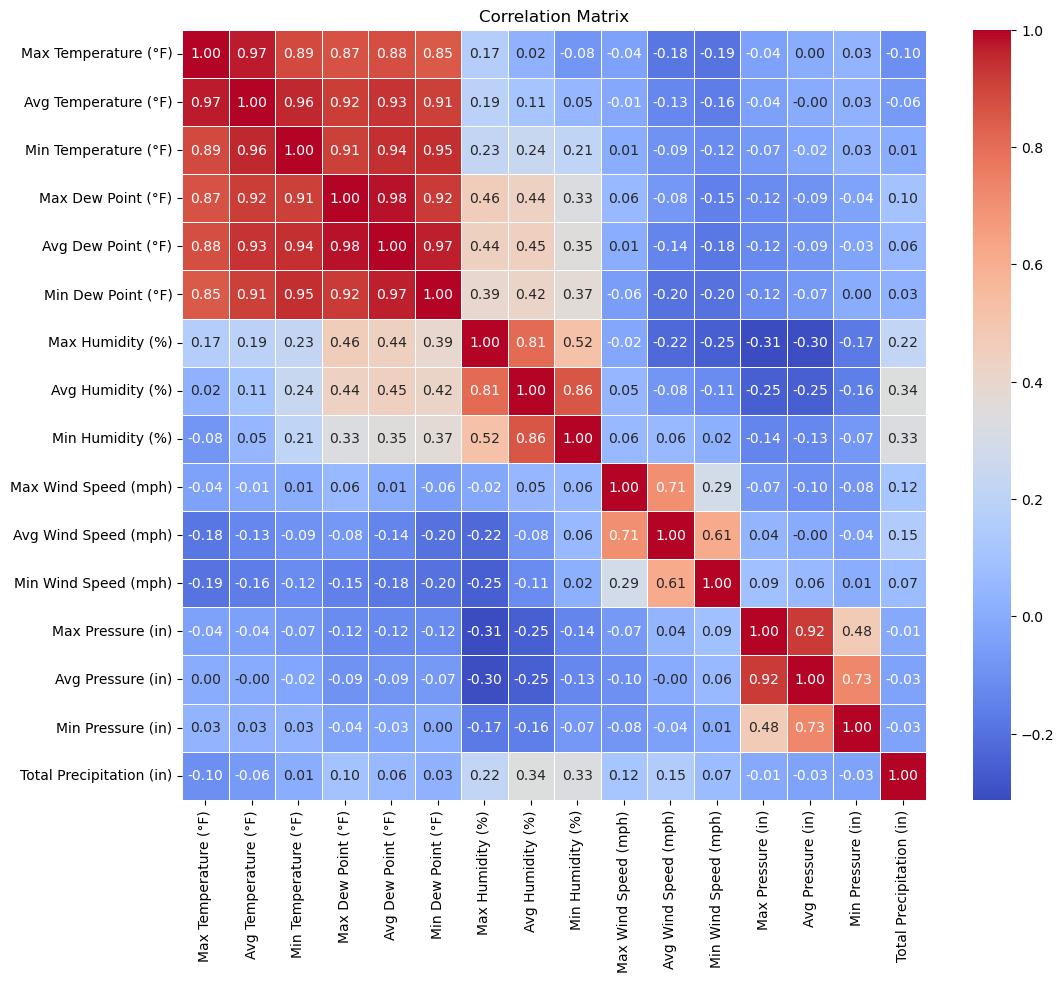

In [39]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [47]:
final_df = df[['Time', 
        'Avg Temperature (°F)',
        'Avg Dew Point (°F)',
        'Avg Humidity (%)',
        'Avg Wind Speed (mph)',
        'Avg Pressure (in)',
        'Total Precipitation (in)', 
        'City']]
final_df['Temperature Diff'] = df['Max Temperature (°F)']-df['Min Temperature (°F)']
final_df['Dew Point Diff'] = df['Max Dew Point (°F)']-df['Min Dew Point (°F)']
final_df['Humidity Diff'] = df['Max Humidity (%)']-df['Min Humidity (%)']
final_df['Wind Speed Diff'] = df['Max Wind Speed (mph)']-df['Min Wind Speed (mph)']

C:\Users\yairs\AppData\Local\Temp\ipykernel_42316\1828177871.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Temperature Diff'] = df['Max Temperature (°F)']-df['Min Temperature (°F)']
C:\Users\yairs\AppData\Local\Temp\ipykernel_42316\1828177871.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Dew Point Diff'] = df['Max Dew Point (°F)']-df['Min Dew Point (°F)']
C:\Users\yairs\AppData\Local\Temp\ipykernel_42316\1828177871.py:11: SettingWithCopyWarning: 
A value is trying to be set 

In [41]:
df.columns

Index(['Time', 'Max Temperature (°F)', 'Avg Temperature (°F)',
       'Min Temperature (°F)', 'Max Dew Point (°F)', 'Avg Dew Point (°F)',
       'Min Dew Point (°F)', 'Max Humidity (%)', 'Avg Humidity (%)',
       'Min Humidity (%)', 'Max Wind Speed (mph)', 'Avg Wind Speed (mph)',
       'Min Wind Speed (mph)', 'Max Pressure (in)', 'Avg Pressure (in)',
       'Min Pressure (in)', 'Total Precipitation (in)', 'City'],
      dtype='object')

In [48]:
final_df

,Time,Avg Temperature (°F),Avg Dew Point (°F),Avg Humidity (%),Avg Wind Speed (mph),Avg Pressure (in),Total Precipitation (in),City,Temperature Diff,Dew Point Diff,Humidity Diff,Wind Speed Diff
0,2022-01-01,64.5,58.9,83.2,11.6,27.6,0.00,"London, UK",19,9,38,18
1,2022-01-02,57.3,54.4,90.5,8.2,27.6,0.93,"London, UK",13,13,25,16
2,2022-01-03,38.0,34.1,85.9,22.8,27.6,0.65,"London, UK",24,27,36,35
3,2022-01-04,31.1,23.3,74.9,5.7,28.0,0.01,"London, UK",20,6,45,12
4,2022-01-05,40.6,28.8,64.1,5.0,27.7,0.00,"London, UK",21,12,41,15
...,...,...,...,...,...,...,...,...,...,...,...,...
9120,2022-12-27,32.3,22.9,69.9,4.7,27.9,0.00,"Baltimore, USA",20,5,39,14
9121,2022-12-28,32.2,20.8,67.9,2.0,28.0,0.00,"Baltimore, USA",32,10,61,10
9122,2022-12-29,40.1,27.9,65.5,3.3,28.1,0.00,"Baltimore, USA",38,16,53,12
9123,2022-12-30,42.3,40.9,94.6,3.0,28.0,0.00,"Baltimore, USA",24,24,17,9
